<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_fft_r2-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-3-r2.csv?token=AKVFSOGR6KDKUED4JXHRL2C6ZLIWC')
print(df.shape)
df

(50621, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,1
1,80,4,2,1,1,4,3,9,3,3,24,8,3,5,1,0.200000,8,1,2,2,2,4,8,1,4,12,3,27,9,1
2,206,1,2,1,1,4,3,9,3,3,22,6,5,2,1,0.500000,8,1,1,1,1,1,2,1,4,20,3,27,9,1
3,220,1,4,1,1,4,3,9,0,0,22,6,6,3,2,0.666667,12,1,1,1,1,1,4,1,4,24,3,27,9,1
4,346,2,4,1,1,4,3,9,0,0,23,7,8,4,2,0.500000,12,2,1,2,2,4,8,1,4,32,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50616,3268946,1,2,5,2,2,3,9,3,3,22,6,20044,2,1,0.500000,15,5,2,6,10,60,2,10,20,400880,15,27,45,1
50617,3268953,1,2,5,3,2,3,9,3,3,22,6,20044,2,1,0.500000,22,4,3,6,12,72,2,15,30,601320,15,27,45,1
50618,3268960,1,2,5,4,2,3,9,3,3,22,6,20044,2,1,0.500000,29,3,4,6,12,72,2,20,40,801760,15,27,45,1
50619,3268967,1,2,5,5,3,3,9,3,3,22,6,20044,2,1,0.500000,36,2,5,6,10,60,2,25,75,1503300,15,27,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-1-r2.csv?token=AKVFSODJUY5YYCMB5N2C6ZK6ZLIX4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-6-r2.csv?token=AKVFSOCRWTOI7IDRU5AMUPS6ZLIX6')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-9-r2.csv?token=AKVFSOFVO6PXVC3TNNYRHL26ZLIYC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-14-r2.csv?token=AKVFSOHWYI3635AMYIB2GGK6ZLIYE')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-5-r2.csv?token=AKVFSOE6ZSYKVK6GF3DZYVC6ZLI26')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-12-r2.csv?token=AKVFSOAW4EWZXTMHA5WHMFS6ZLI3C')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-15-r2.csv?token=AKVFSOBZNPNSP6MEZSGHA7K6ZLI3E')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(73693, 30)
(60423, 30)
(59155, 30)
(59928, 30)
(30994, 30)
(30754, 30)
(31029, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,3,1,3,3,9,8,1,4,8,3,27,9,0
1,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,1
2,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,0
3,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,2,2,3,4,12,8,1,4,4,3,30,9,0
4,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396592,3275310,4,0,6,4,2,3,12,18,2,20,4,20057,3,0,0.000000,25,1,1,1,1,1,0,24,48,962736,18,36,54,1
396593,3275317,4,0,6,5,3,3,12,18,2,20,4,20057,3,0,0.000000,32,1,1,1,1,1,0,30,90,1805130,18,36,54,1
396594,3275318,4,0,2,1,4,3,9,18,2,20,4,20058,3,0,0.000000,32,1,1,1,1,1,0,2,8,160464,6,27,18,1
396595,3275319,2,0,7,1,4,3,10,18,2,15,15,20057,4,0,0.000000,5,1,1,1,1,1,0,7,28,561596,21,30,63,1


In [0]:
df.shape

(396597, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-2-r2.csv?token=AKVFSOFKYA3ZOBL2ZKZ66WS6ZLJAG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-5-r2.csv?token=AKVFSOGI5ZZHETZ4YUDPAQS6ZLJAK')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-10-r2.csv?token=AKVFSOG7GLTCY66ZKIZCDSK6ZLJAM')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-12-r2.csv?token=AKVFSOBRVD7HBAWY3JHCBPK6ZLJAQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-13-r2.csv?token=AKVFSOH6YSV46UJ33SIGKEK6ZLJAU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-15-r2.csv?token=AKVFSOFYUTTCLRT3JW3HWWS6ZLJAY')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-10-r2.csv?token=AKVFSOEOETP7LO2FHVVAAPC6ZLJGY')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(118677, 30)
(59157, 30)
(59928, 30)
(59655, 30)
(59647, 30)
(59942, 30)
(31802, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,2,2,23,7,2,2,0,0.0,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.5,12,7,2,8,14,112,8,1,4,4,3,27,9,0
2,80,0,1,4,1,1,5,17,23,7,2,2,2,2,2,1.0,12,6,3,8,18,144,0,4,4,8,20,85,100,0
3,80,4,2,1,1,4,3,9,3,3,24,8,4,5,1,0.2,8,5,4,8,20,160,8,1,4,16,3,27,9,0
4,81,0,1,4,2,2,5,17,23,7,2,2,2,2,2,1.0,13,4,5,8,20,160,0,8,16,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118672,3270462,1,2,5,2,2,3,9,3,3,22,6,30067,2,1,0.5,15,5,3,7,15,105,2,10,20,601340,15,27,45,0
118673,3270469,1,2,5,3,2,3,9,3,3,22,6,30067,2,1,0.5,22,4,4,7,16,112,2,15,30,902010,15,27,45,0
118674,3270476,1,2,5,4,2,3,9,3,3,22,6,30067,2,1,0.5,29,3,5,7,15,105,2,20,40,1202680,15,27,45,0
118675,3270483,1,2,5,5,3,3,9,3,3,22,6,30067,2,1,0.5,36,2,6,7,12,84,2,25,75,2255025,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.494187,0.202798,0.020669,-0.030703,NaN,0.256455,-0.001631,0.242351,-0.650547,-0.782991,-0.152942,-0.068342,0.084219,0.009976,0.018507,0.011983,0.464151,0.104087,0.085816,0.055458,0.202798,0.256455,0.202798,-0.052521
inport,-0.494187,1.000000,-0.168152,0.044242,-0.065749,NaN,-0.424051,0.015100,0.235898,0.620651,0.462518,0.221711,-0.006337,-0.141667,-0.093002,-0.099244,-0.092770,0.422667,-0.039726,-0.048208,-0.024419,-0.168152,-0.424051,-0.168152,0.062190
cache_coherence_type,0.202798,-0.168152,1.000000,0.377354,-0.560851,NaN,-0.178194,-0.003276,-0.044550,-0.236258,-0.218573,-0.500268,0.059216,-0.040612,0.011690,0.028993,0.026701,-0.008756,0.549172,0.440824,0.302949,1.000000,-0.178194,1.000000,0.011295
flit_id,0.020669,0.044242,0.377354,1.000000,-0.062741,NaN,-0.252006,0.019352,0.047025,-0.006132,-0.014146,0.526589,0.029171,0.028132,0.036008,0.054436,0.033402,0.038074,0.974734,0.936195,0.676248,0.377354,-0.252006,0.377354,-0.001494
flit_type,-0.030703,-0.065749,-0.560851,-0.062741,1.000000,NaN,0.374556,-0.028799,-0.069869,0.009120,0.021019,0.544468,-0.125722,0.156967,0.019634,-0.005353,-0.004569,-0.056572,-0.161194,0.096845,0.062876,-0.560851,0.374556,-0.560851,0.002234
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.256455,-0.424051,-0.178194,-0.252006,0.374556,NaN,1.000000,-0.015788,-0.136019,-0.410779,-0.351568,0.020564,-0.021691,0.195469,0.109197,0.114427,0.111340,-0.293580,-0.229473,-0.143373,-0.114322,-0.178194,1.000000,-0.178194,0.010907
traversal_id,-0.001631,0.015100,-0.003276,0.019352,-0.028799,NaN,-0.015788,1.000000,0.037147,-0.028053,-0.031641,0.015881,0.100848,0.100892,0.126768,0.094365,0.069805,0.021451,0.010200,0.004455,0.542946,-0.003276,-0.015788,-0.003276,-0.293202
hop_count,0.242351,0.235898,-0.044550,0.047025,-0.069869,NaN,-0.136019,0.037147,1.000000,0.225788,-0.407550,0.117980,-0.121613,-0.060213,-0.114255,-0.106428,-0.102831,0.507888,0.034082,0.009204,0.025485,-0.044550,-0.136019,-0.044550,0.089692
current_hop,-0.650547,0.620651,-0.236258,-0.006132,0.009120,NaN,-0.410779,-0.028053,0.225788,1.000000,0.729185,0.267045,-0.030323,-0.161968,-0.120831,-0.116740,-0.098691,0.113794,-0.094223,-0.086650,-0.072441,-0.236258,-0.410779,-0.236258,0.159035


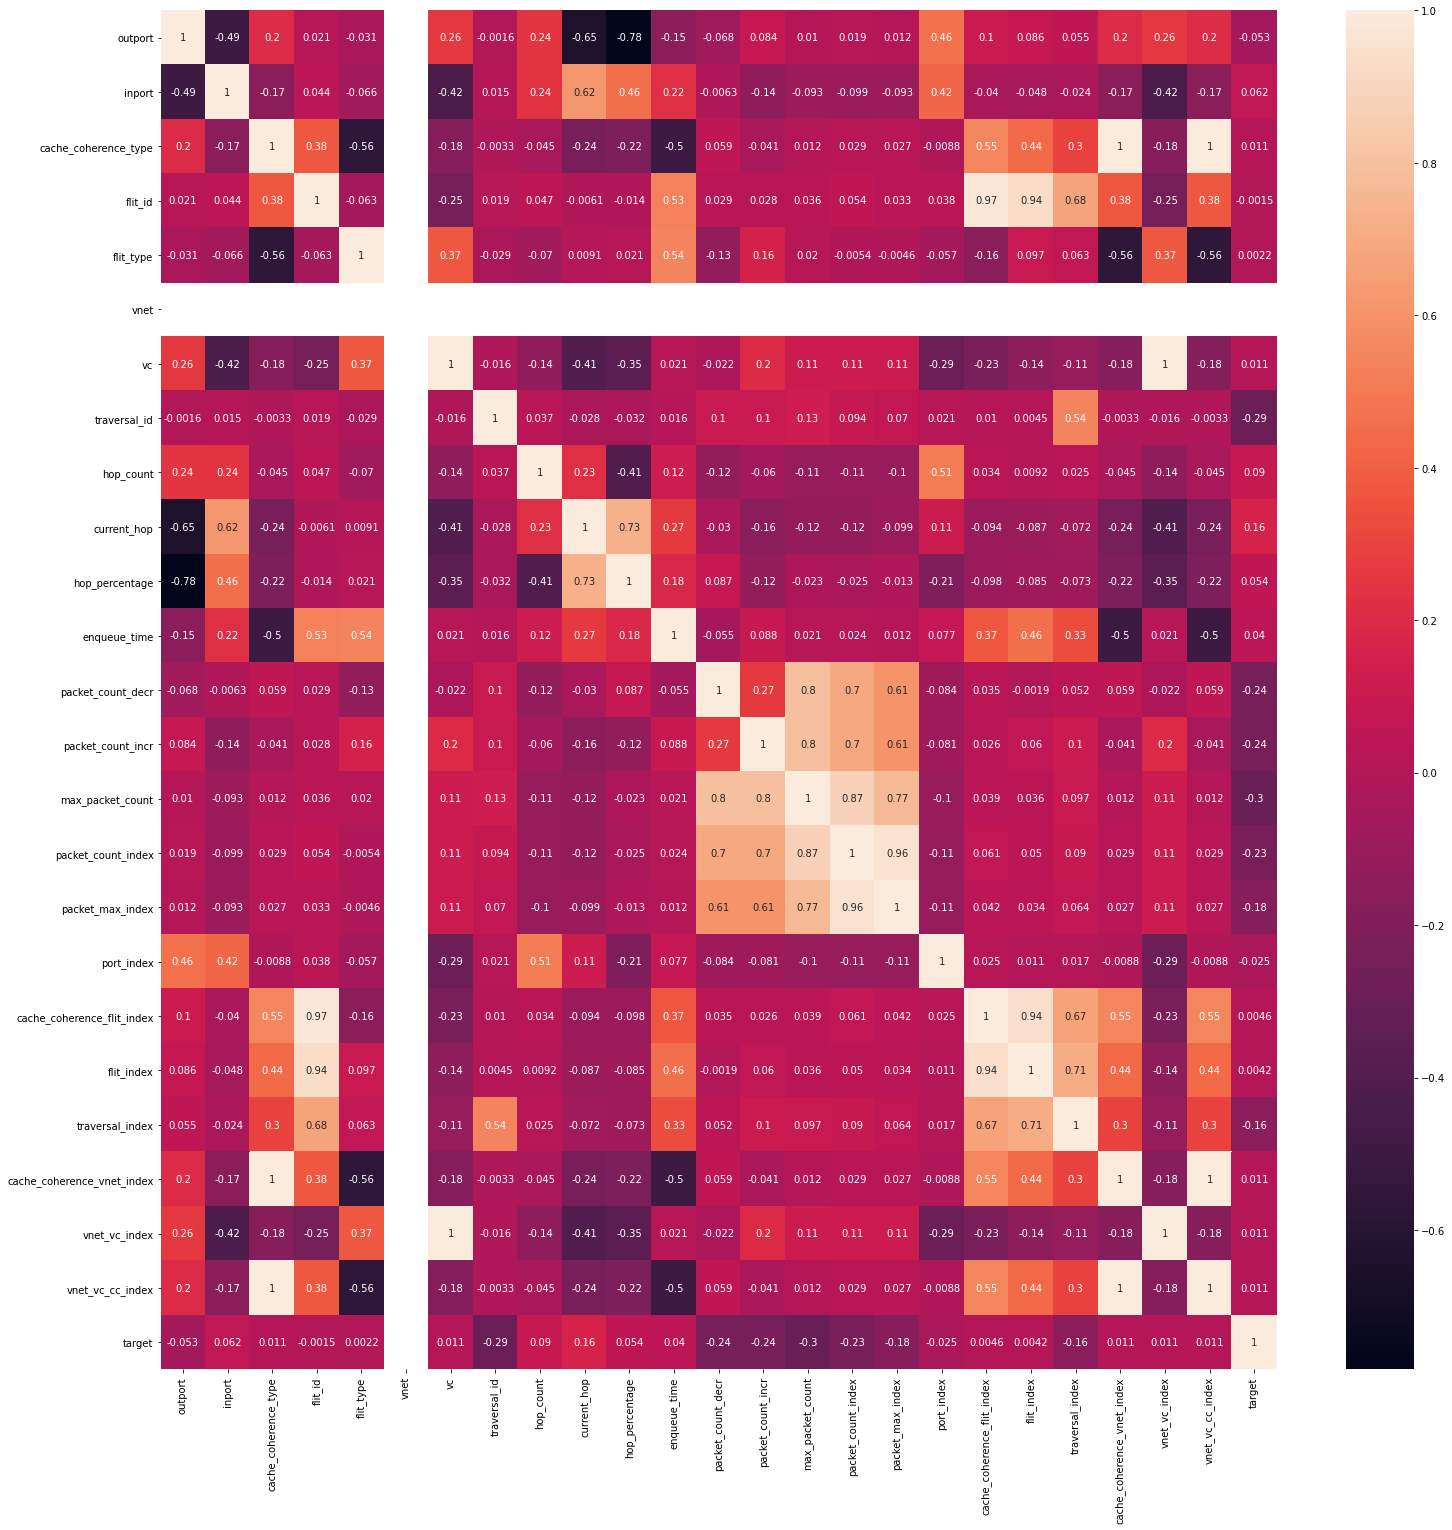

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,2,3,1,0.333333,8,3,1,3,3,9,8,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9
3,2,4,1,1,4,3,10,1,4,2,0.500000,12,2,2,3,4,12,8,1,4,4,3,30,9
4,2,4,1,1,4,3,9,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396592,4,0,6,4,2,3,12,20057,3,0,0.000000,25,1,1,1,1,1,0,24,48,962736,18,36,54
396593,4,0,6,5,3,3,12,20057,3,0,0.000000,32,1,1,1,1,1,0,30,90,1805130,18,36,54
396594,4,0,2,1,4,3,9,20058,3,0,0.000000,32,1,1,1,1,1,0,2,8,160464,6,27,18
396595,2,0,7,1,4,3,10,20057,4,0,0.000000,5,1,1,1,1,1,0,7,28,561596,21,30,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.2,0.333333,0.064516,0.055556,0.000000,0.055556,0.005556,0.000599,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.4,0.500000,0.129032,0.027778,0.000000,0.027778,0.002778,0.000225,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.4,0.500000,0.129032,0.027778,0.000000,0.027778,0.002778,0.000225,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.00,0.000000,0.00,1.000000,0.0,0.333333,0.000000,0.6,0.4,0.500000,0.129032,0.027778,0.027778,0.055556,0.008333,0.000824,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
4,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.4,0.500000,0.129032,0.027778,0.000000,0.027778,0.002778,0.000225,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396592,1.0,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.666534,0.4,0.0,0.000000,0.338710,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.355525,0.833333,1.000000,0.833333
396593,1.0,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.666534,0.4,0.0,0.000000,0.451613,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.666611,0.833333,1.000000,0.833333
396594,1.0,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.666567,0.4,0.0,0.000000,0.451613,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.059256,0.166667,0.000000,0.166667
396595,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.666534,0.6,0.0,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.207389,1.000000,0.333333,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(16688, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.333333,0.0,0.0,0.000000,0.212121,0.000000,0.212121,0.022951,0.006056,0.00,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.4,0.5,0.135593,0.181818,0.030303,0.212121,0.042623,0.010670,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.333333,0.4,1.0,0.135593,0.151515,0.060606,0.212121,0.055738,0.013746,0.00,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,1.00,0.50,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.2,0.2,0.067797,0.121212,0.090909,0.212121,0.062295,0.015284,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.333333,0.4,1.0,0.152542,0.090909,0.121212,0.212121,0.062295,0.015284,0.00,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118672,0.25,0.50,0.666667,0.25,0.333333,0.0,0.000,0.999967,0.333333,0.2,0.5,0.186441,0.121212,0.060606,0.181818,0.045902,0.009997,0.25,0.310345,0.186047,0.222236,0.666667,0.000000,0.395604
118673,0.25,0.50,0.666667,0.50,0.333333,0.0,0.000,0.999967,0.333333,0.2,0.5,0.305085,0.090909,0.090909,0.181818,0.049180,0.010670,0.25,0.482759,0.302326,0.333355,0.666667,0.000000,0.395604
118674,0.25,0.50,0.666667,0.75,0.333333,0.0,0.000,0.999967,0.333333,0.2,0.5,0.423729,0.060606,0.121212,0.181818,0.045902,0.009997,0.25,0.655172,0.418605,0.444473,0.666667,0.000000,0.395604
118675,0.25,0.50,0.666667,1.00,0.666667,0.0,0.000,0.999967,0.333333,0.2,0.5,0.542373,0.030303,0.151515,0.181818,0.036066,0.007978,0.25,0.827586,0.825581,0.833389,0.666667,0.000000,0.395604


In [0]:
test_X[test_X.duplicated()].shape

(8, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(54, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.666667,0.500000,0.133333,0.033333,0.000000,0.033333,0.003922,0.000378,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.333333,0.200000,0.066667,0.000000,0.033333,0.033333,0.003922,0.000378,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.2,0.333333,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.666667,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.666667,0.500000,0.133333,0.033333,0.000000,0.033333,0.003922,0.000378,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59152,0.25,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.183333,0.133333,0.033333,0.166667,0.035294,0.007435,0.25,0.310345,0.186047,0.222236,0.666667,0.000000,0.666667
59153,0.25,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.300000,0.100000,0.066667,0.166667,0.043137,0.008948,0.25,0.482759,0.302326,0.333355,0.666667,0.000000,0.666667
59154,0.25,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.416667,0.066667,0.100000,0.166667,0.043137,0.008948,0.25,0.655172,0.418605,0.444473,0.666667,0.000000,0.666667
59155,0.25,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.533333,0.033333,0.133333,0.166667,0.035294,0.007435,0.25,0.827586,0.825581,0.833389,0.666667,0.000000,0.666667


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(51, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.666667,0.500000,0.133333,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.333333,0.200000,0.066667,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.2,0.333333,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.666667,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.666667,0.500000,0.133333,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59923,0.25,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.183333,0.000000,0.068966,0.068966,0.008368,0.001111,0.25,0.310345,0.186047,0.222236,0.666667,0.000000,0.666667
59924,0.25,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.300000,0.103448,0.000000,0.103448,0.012552,0.002084,0.25,0.482759,0.302326,0.333355,0.666667,0.000000,0.666667
59925,0.25,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.416667,0.068966,0.034483,0.103448,0.020921,0.003195,0.25,0.655172,0.418605,0.444473,0.666667,0.000000,0.666667
59926,0.25,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.333333,0.500000,0.533333,0.034483,0.068966,0.103448,0.020921,0.003195,0.25,0.827586,0.825581,0.833389,0.666667,0.000000,0.666667


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.4,0.500000,0.133333,0.03125,0.00000,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.50,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.2,0.200000,0.066667,0.00000,0.03125,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.25,0.50,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.2,0.2,0.500000,0.066667,0.00000,0.00000,0.00000,0.000000,0.000000,0.25,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.4,0.4,0.666667,0.133333,0.00000,0.00000,0.00000,0.000000,0.000000,0.50,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
4,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.6,0.4,0.500000,0.133333,0.03125,0.00000,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,1.00,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.4,0.0,0.000000,0.350000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00,0.793103,0.511628,0.533333,0.833333,0.333333,0.833333
59651,1.00,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.4,0.0,0.000000,0.466667,0.00000,0.00000,0.00000,0.000000,0.000000,0.00,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
59652,1.00,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.4,0.0,0.000000,0.466667,0.00000,0.00000,0.00000,0.000000,0.000000,0.00,0.034483,0.046512,0.088890,0.166667,0.666667,0.166667
59653,1.00,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.8,0.0,0.000000,0.016667,0.00000,0.00000,0.00000,0.000000,0.000000,0.00,0.206897,0.279070,0.311110,1.000000,1.000000,1.000000


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.50,0.500000,0.133333,0.032258,0.000000,0.032258,0.00369,0.000345,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.25,0.200000,0.066667,0.000000,0.032258,0.032258,0.00369,0.000345,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.2,0.25,0.500000,0.066667,0.000000,0.000000,0.000000,0.00000,0.000000,0.25,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.50,0.666667,0.133333,0.000000,0.000000,0.000000,0.00000,0.000000,0.50,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.50,0.500000,0.133333,0.032258,0.000000,0.032258,0.00369,0.000345,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59642,0.25,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.999967,0.4,0.50,0.666667,0.600000,0.000000,0.161290,0.161290,0.01845,0.004022,0.50,0.000000,0.000000,0.044449,0.000000,0.333333,0.000000
59643,0.50,1.0,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.8,0.50,0.400000,0.133333,0.000000,0.000000,0.000000,0.00000,0.000000,1.00,0.137931,0.011628,0.055563,0.666667,0.000000,0.666667
59644,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.8,0.50,0.400000,0.250000,0.064516,0.000000,0.064516,0.00738,0.000919,1.00,0.310345,0.186047,0.222258,0.666667,0.000000,0.666667
59645,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.8,0.50,0.400000,0.366667,0.032258,0.032258,0.064516,0.01107,0.001264,1.00,0.482759,0.302326,0.333388,0.666667,0.000000,0.666667


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.50,0.500000,0.133333,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.50,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.25,0.200000,0.066667,0.000000,0.035714,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.25,0.50,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.2,0.25,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.50,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.00000,0.50,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.50,0.500000,0.133333,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,1.00,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.4,0.00,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.793103,0.511628,0.533333,0.833333,0.333333,0.833333
59938,1.00,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.4,0.00,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
59939,1.00,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.4,0.00,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.034483,0.046512,0.088890,0.166667,0.666667,0.166667
59940,0.50,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.6,0.00,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.206897,0.279070,0.311110,1.000000,1.000000,1.000000


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000249,0.25,0.666667,0.666667,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000349,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000648,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000
4,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000847,0.75,0.666667,0.400000,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000038,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31797,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.999950,0.75,0.666667,0.400000,0.250000,0.0,0.0,0.0,0.0,0.0,1.0,0.310345,0.186047,0.222265,0.666667,0.000000,0.666667
31798,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.999950,0.75,0.666667,0.400000,0.366667,0.0,0.0,0.0,0.0,0.0,1.0,0.482759,0.302326,0.333398,0.666667,0.000000,0.666667
31799,0.50,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.999950,0.75,0.666667,0.400000,0.483333,0.0,0.0,0.0,0.0,0.0,1.0,0.655172,0.418605,0.444532,0.666667,0.000000,0.666667
31800,0.50,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.999950,0.75,0.666667,0.400000,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.827586,0.825581,0.833499,0.666667,0.000000,0.666667


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    253199
1    143398
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs        Score
14      max_packet_count  6312.921038
7           traversal_id  4631.356316
12     packet_count_decr  3172.471420
13     packet_count_incr  3140.482794
15    packet_count_index  2042.072451
20       traversal_index  1491.028325
16      packet_max_index   966.181048
9            current_hop   759.188465
8              hop_count   274.998693
1                 inport   233.599676
0                outport   209.230859
10        hop_percentage   193.579630
17            port_index    63.188946
11          enqueue_time    51.765670
6                     vc    23.094132
22         vnet_vc_index    23.094132
2   cache_coherence_type     5.014889


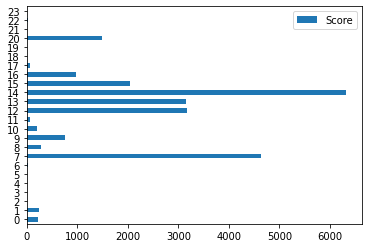

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 72.44048575850125
Test Prediction  72.44326777609682


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  87.19044128179848


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  56.80646415470697


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  57.83773861967695


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.9608582683765


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.46703103257498


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.93760635280772


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.0486761838878


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
9,current_hop,5.317482
16,packet_max_index,3.173652
11,enqueue_time,2.803679
0,outport,2.566267
15,packet_count_index,2.002042
18,cache_coherence_flit_index,1.689185
1,inport,1.490228
21,cache_coherence_vnet_index,0.488912
23,vnet_vc_cc_index,0.488912
2,cache_coherence_type,0.488912


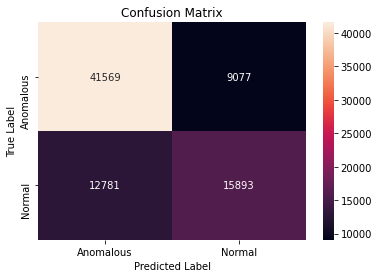

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     50646
           1       0.64      0.55      0.59     28674

    accuracy                           0.72     79320
   macro avg       0.70      0.69      0.69     79320
weighted avg       0.72      0.72      0.72     79320



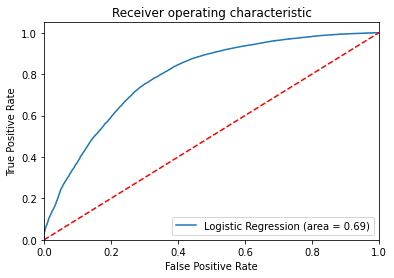

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

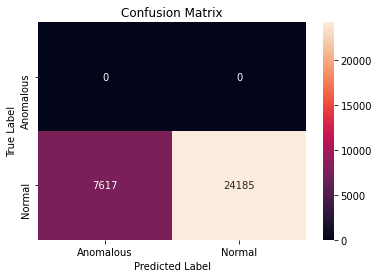

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86     31802

    accuracy                           0.76     31802
   macro avg       0.50      0.38      0.43     31802
weighted avg       1.00      0.76      0.86     31802



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.81954884848255
Test Prediction  82.98159354513363


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  91.53332153660777


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  89.25570938350491


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  91.02589774395942


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  85.12446567764647


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.2499874260231


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  86.61873144039238


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  36.06376957424061


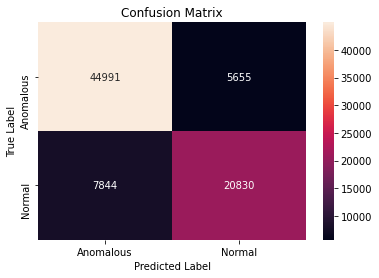

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     50646
           1       0.79      0.73      0.76     28674

    accuracy                           0.83     79320
   macro avg       0.82      0.81      0.81     79320
weighted avg       0.83      0.83      0.83     79320



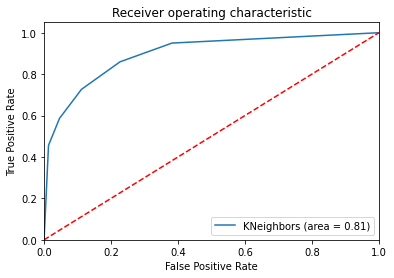

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

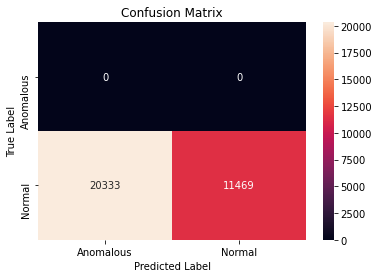

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53     31802

    accuracy                           0.36     31802
   macro avg       0.50      0.18      0.27     31802
weighted avg       1.00      0.36      0.53     31802



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 59.85243178673525
Test Prediction Score 60.22566817952597


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 64.93339063171464


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  41.334077116824716


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  43.12675210252303


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  43.086078283463245


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.892349992455614


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  45.86099896566681


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  84.34375196528521


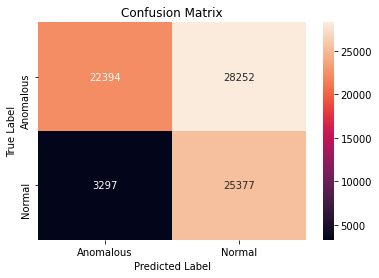

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.44      0.59     50646
           1       0.47      0.89      0.62     28674

    accuracy                           0.60     79320
   macro avg       0.67      0.66      0.60     79320
weighted avg       0.73      0.60      0.60     79320



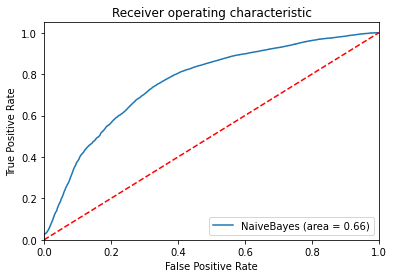

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 253821 samples, validate on 63456 samples
Epoch 1/10
253821/253821 [==============================] - 10s 39us/step - loss: 0.1926 - accuracy: 0.6911 - val_loss: 0.1854 - val_accuracy: 0.7107
Epoch 2/10
253821/253821 [==============================] - 10s 39us/step - loss: 0.1820 - accuracy: 0.7173 - val_loss: 0.1822 - val_accuracy: 0.7181
Epoch 3/10
253821/253821 [==============================] - 10s 39us/step - loss: 0.1792 - accuracy: 0.7239 - val_loss: 0.1805 - val_accuracy: 0.7221
Epoch 4/10
253821/253821 [==============================] - 9s 37us/step - loss: 0.1779 - accuracy: 0.7276 - val_loss: 0.1798 - val_accuracy: 0.7254
Epoch 5/10
253821/253821 [==============================] - 9s 37us/step - loss: 0.1773 - accuracy: 0.7292 - val_loss: 0.1791 - val_accuracy: 0.7295
Epoch 6/10
253821/253821 [==============================] - 10s 38us/step - loss: 0.1770 - accuracy: 0.7298 - val_loss: 0.1787 - val_accuracy: 0.7288
Epoch 7/10
253821/253821 [=========================

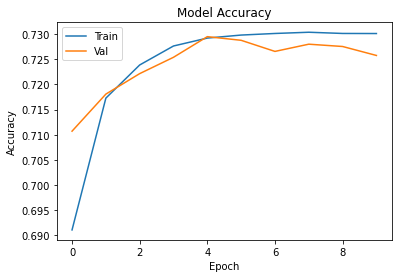

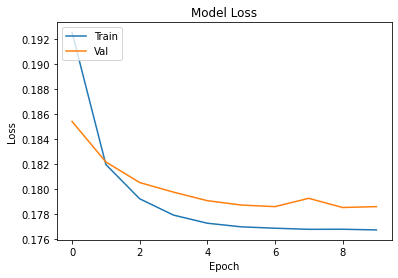

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.79%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.04%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 55.10%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.11%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.54%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.76%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.17%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.15%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 253821 samples, validate on 63456 samples
Epoch 1/30
253821/253821 [==============================] - 9s 36us/step - loss: 0.2197 - accuracy: 0.6535 - val_loss: 0.1985 - val_accuracy: 0.6941
Epoch 2/30
253821/253821 [==============================] - 9s 36us/step - loss: 0.1867 - accuracy: 0.7170 - val_loss: 0.1818 - val_accuracy: 0.7250
Epoch 3/30
253821/253821 [==============================] - 9s 37us/step - loss: 0.1777 - accuracy: 0.7331 - val_loss: 0.1782 - val_accuracy: 0.7364
Epoch 4/30
253821/253821 [==============================] - 9s 37us/step - loss: 0.1753 - accuracy: 0.7392 - val_loss: 0.1768 - val_accuracy: 0.7388
Epoch 5/30
253821/253821 [==============================] - 9s 36us/step - loss: 0.1744 - accuracy: 0.7414 - val_loss: 0.1762 - val_accuracy: 0.7392
Epoch 6/30
253821/253821 [==============================] - 9s 36us/step - loss: 0.1740 - accuracy: 0.7429 - val_loss: 0.1760 - val_accuracy: 0.7374
Epoch 7/30
253821/253821 [=============================

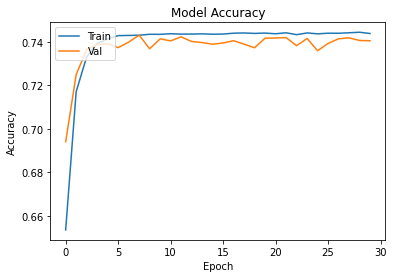

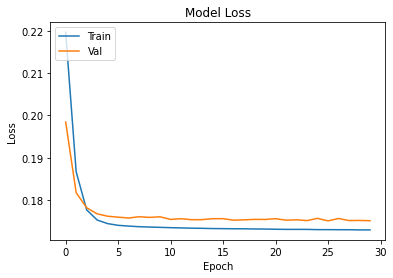

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.42%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.61%
accuracy: 70.18%
accuracy: 71.61%
accuracy: 79.39%
accuracy: 75.58%
accuracy: 76.71%
accuracy: 66.13%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 253821 samples, validate on 63456 samples
Epoch 1/30
253821/253821 [==============================] - 10s 38us/step - loss: 0.2262 - accuracy: 0.6367 - val_loss: 0.2108 - val_accuracy: 0.6633
Epoch 2/30
253821/253821 [==============================] - 9s 37us/step - loss: 0.1899 - accuracy: 0.7096 - val_loss: 0.1824 - val_accuracy: 0.7217
Epoch 3/30
253821/253821 [==============================] - 10s 38us/step - loss: 0.1779 - accuracy: 0.7313 - val_loss: 0.1783 - val_accuracy: 0.7315
Epoch 4/30
253821/253821 [==============================] - 10s 38us/step - loss: 0.1761 - accuracy: 0.7352 - val_loss: 0.1774 - val_accuracy: 0.7341
Epoch 5/30
253821/253821 [==============================] - 10s 38us/step - loss: 0.1754 - accuracy: 0.7380 - val_loss: 0.1773 - val_accuracy: 0.7323
Epoch 6/30
253821/253821 [==============================] - 10s 38us/step - loss: 0.1746 - accuracy: 0.7402 - val_loss: 0.1759 - val_accuracy: 0.7383
Epoch 7/30
253821/253821 [========================

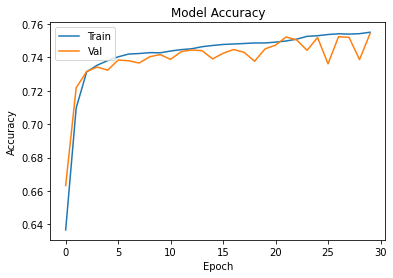

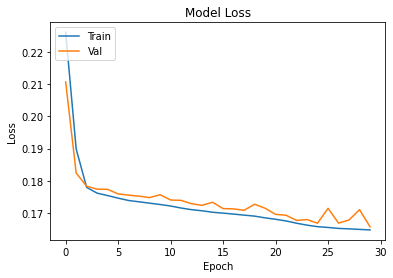

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.64%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.06%
accuracy: 51.17%
accuracy: 53.75%
accuracy: 76.56%
accuracy: 64.59%
accuracy: 65.91%
accuracy: 68.56%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 253821 samples, validate on 63456 samples
Epoch 1/100
253821/253821 [==============================] - 17s 66us/step - loss: 0.1673 - accuracy: 0.7497 - val_loss: 0.1558 - val_accuracy: 0.7666
Epoch 2/100
253821/253821 [==============================] - 18s 72us/step - loss: 0.1586 - accuracy: 0.7641 - val_loss: 0.1523 - val_accuracy: 0.7724
Epoch 3/100
253821/253821 [==============================] - 17s 68us/step - loss: 0.1552 - accuracy: 0.7693 - val_loss: 0.1490 - val_accuracy: 0.7755
Epoch 4/100
253821/253821 [==============================] - 17s 66us/step - loss: 0.1523 - accuracy: 0.7738 - val_loss: 0.1501 - val_accuracy: 0.7812
Epoch 5/100
253821/253821 [==============================] - 18s 69us/step - loss: 0.1500 - accuracy: 0.7767 - val_loss: 0.1483 - val_accuracy: 0.7802
Epoch 6/100
253821/253821 [==============================] - 17s 68us/step - loss: 0.1481 - accuracy: 0.7780 - val_loss: 0.1423 - val_accuracy: 0.7862
Epoch 7/100
253821/253821 [================

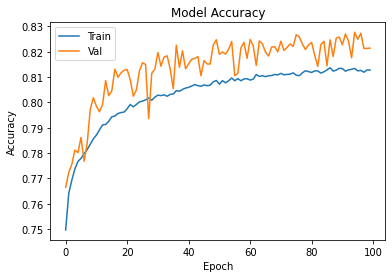

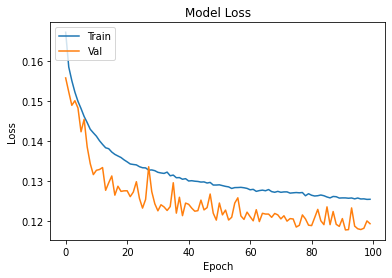

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.11%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.50%
accuracy: 78.39%
accuracy: 79.69%
accuracy: 85.89%
accuracy: 83.91%
accuracy: 84.23%
accuracy: 38.11%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 253821 samples, validate on 63456 samples
Epoch 1/50
253821/253821 [==============================] - 18s 71us/step - loss: 0.1689 - accuracy: 0.7457 - val_loss: 0.1573 - val_accuracy: 0.7629
Epoch 2/50
253821/253821 [==============================] - 20s 78us/step - loss: 0.1594 - accuracy: 0.7618 - val_loss: 0.1527 - val_accuracy: 0.7692
Epoch 3/50
253821/253821 [==============================] - 20s 79us/step - loss: 0.1553 - accuracy: 0.7667 - val_loss: 0.1481 - val_accuracy: 0.7772
Epoch 4/50
253821/253821 [==============================] - 18s 71us/step - loss: 0.1528 - accuracy: 0.7723 - val_loss: 0.1451 - val_accuracy: 0.7845
Epoch 5/50
253821/253821 [==============================] - 18s 72us/step - loss: 0.1512 - accuracy: 0.7750 - val_loss: 0.1438 - val_accuracy: 0.7871
Epoch 6/50
253821/253821 [==============================] - 18s 71us/step - loss: 0.1500 - accuracy: 0.7760 - val_loss: 0.1458 - val_accuracy: 0.7872
Epoch 7/50
253821/253821 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.32%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.01%
accuracy: 77.11%
accuracy: 78.39%
accuracy: 82.21%
accuracy: 79.67%
accuracy: 79.82%
accuracy: 40.82%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.96661592236437
Test Prediction Score 91.97428139183056


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.30238378118759
Test Prediction Score 72.94149466673429
Test Prediction Score 73.81691362968897
Test Prediction Score 86.83932612522001
Test Prediction Score 87.2348986537462
Test Prediction Score 86.83227119548897
Test Prediction Score 34.114206653669584


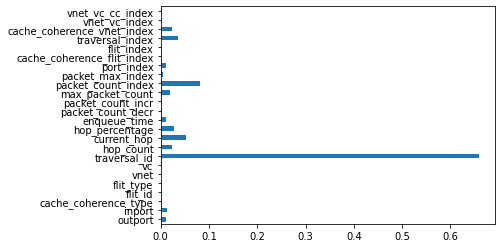

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

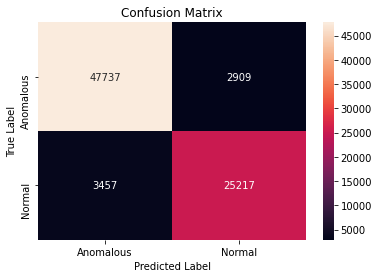

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     50646
           1       0.90      0.88      0.89     28674

    accuracy                           0.92     79320
   macro avg       0.91      0.91      0.91     79320
weighted avg       0.92      0.92      0.92     79320



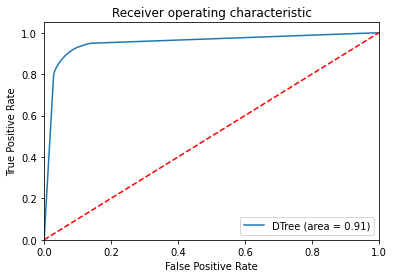

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.13632882307888
Test Prediction Score 93.10262228946041


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 83.1054037429325
Test Prediction Score 74.53555792213939
Test Prediction Score 76.09297824055533
Test Prediction Score 87.85013829519738
Test Prediction Score 88.76892383523061
Test Prediction Score 88.23195755897368
Test Prediction Score 30.485504056348656


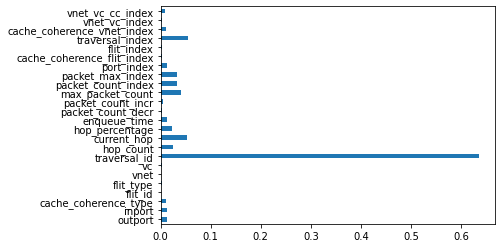

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

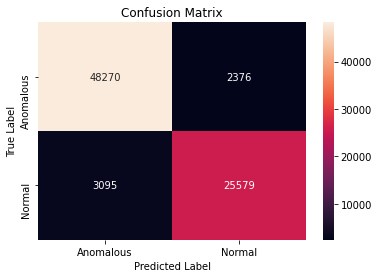

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     50646
           1       0.92      0.89      0.90     28674

    accuracy                           0.93     79320
   macro avg       0.93      0.92      0.92     79320
weighted avg       0.93      0.93      0.93     79320



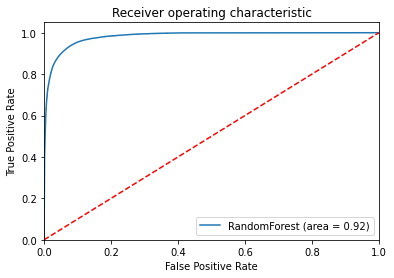

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [123]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [125]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.0248268862855
Test Prediction Score 95.03530005042865


In [126]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.3811353505734
Test Prediction Score 72.63045793397231
Test Prediction Score 74.19903884661593
Test Prediction Score 88.10661302489314
Test Prediction Score 92.10521903867756
Test Prediction Score 92.12238497213974
Test Prediction Score 23.34129928935287


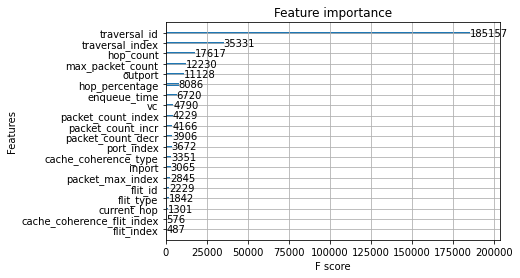

In [127]:
plot_importance(xgbc)
plt.show()

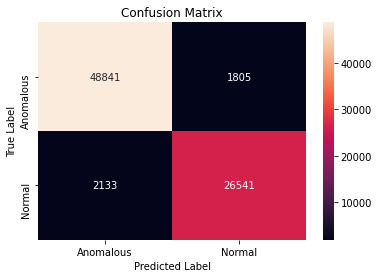

In [128]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [129]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     50646
           1       0.94      0.93      0.93     28674

    accuracy                           0.95     79320
   macro avg       0.95      0.94      0.95     79320
weighted avg       0.95      0.95      0.95     79320



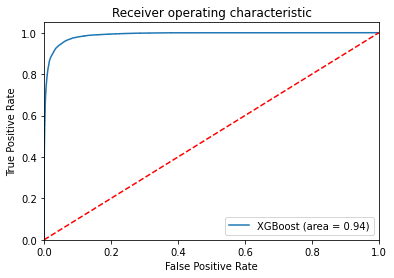

In [130]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [132]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [134]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 87.63698597755274
Test Prediction Score 86.7523953605648


In [135]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 85.77736208363879
Test Prediction Score 70.34163328093041
Test Prediction Score 72.3000934454679
Test Prediction Score 85.83521917693405
Test Prediction Score 85.64722450416618
Test Prediction Score 85.28577625037536
Test Prediction Score 22.20615055656877


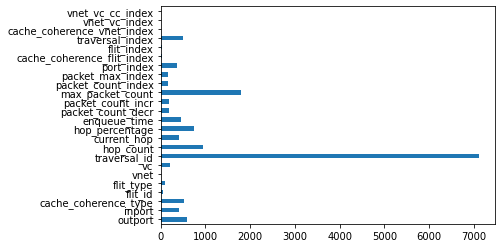

In [136]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

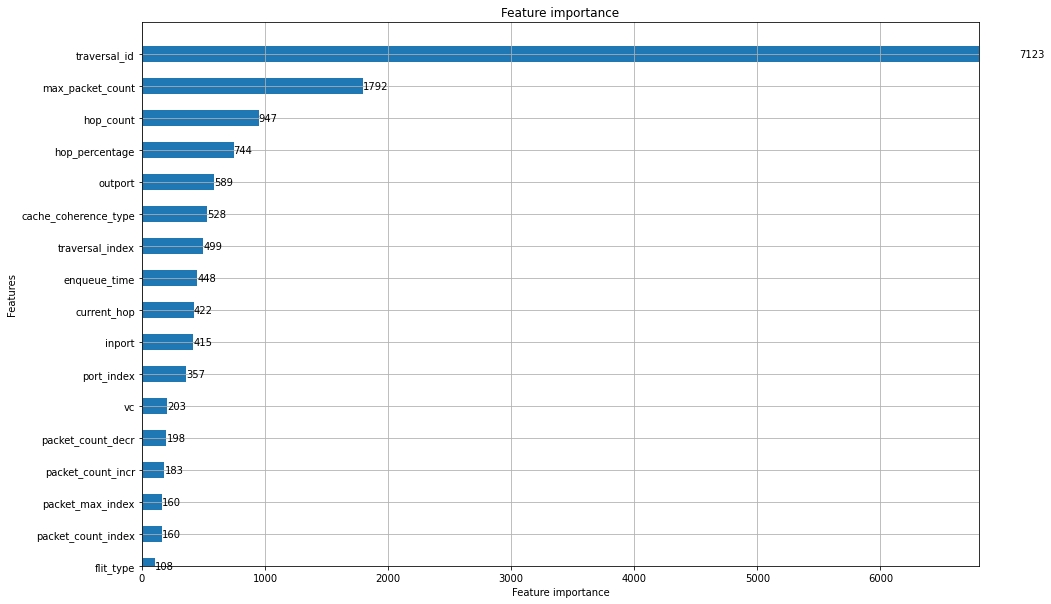

In [137]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [138]:
sorted(gbm.feature_importances_,reverse=True)

[7123,
 1792,
 947,
 744,
 589,
 528,
 499,
 448,
 422,
 415,
 357,
 203,
 198,
 183,
 160,
 160,
 108,
 49,
 39,
 36,
 0,
 0,
 0,
 0]

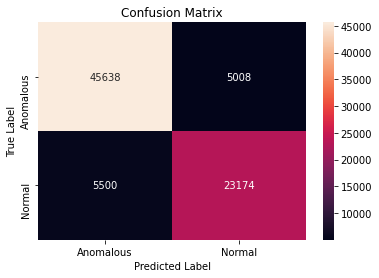

In [139]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     50646
           1       0.82      0.81      0.82     28674

    accuracy                           0.87     79320
   macro avg       0.86      0.85      0.86     79320
weighted avg       0.87      0.87      0.87     79320



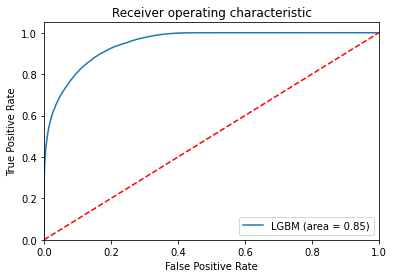

In [141]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()